# Distribuciones de probabilidad, observación de una lluvia de meteoritos y campo geomagnético

## Setup

Durante la clase de hoy usaremos los siguientes paquetes

In [137]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as scipy
import scipy.stats as sps

## Lanzando una moneda

Supongamos que hemos lanzando una moneda 10 veces usando ``np.random.choice([0, 1])``. ¿Cuántas veces saldrá cara? 1 es cara, 0 es sello. Usemos un loop for y hagamos que Python simule un escenario de lanzamiento de moneda.

Este bloque de código es la primera vez que usamos un bucle for. Para bucles, el resultado es un fragmento de código (en Python el fragmento que está identado) que se ejecuta varias veces. En este caso, el código se repetirá 10 veces, especificado por rango (0,10).

In [138]:
for flip in range(0,10):
    flip_result = np.random.choice([0, 1])
    print(flip_result)

1
1
1
0
1
1
1
1
1
1


Ahora registremos cuántas veces el resultado fue cara. Haremos una lista llamada ``flip_results`` y la dejaremos en blanco para comenzar. Cada vez que corramos el código, agregaremos el resultado a la lista:

In [139]:
flip_results = []

for flip in range(0,10):
    flip_result = np.random.choice([0, 1])
    flip_results.append(flip_result)
    
flip_results

[0, 1, 0, 0, 0, 1, 0, 0, 0, 1]

Podemos calcular cuántas veces fueron caras tomando la suma de la lista:

In [140]:
np.sum(flip_results)

3

Ahora lancemos la moneda 10 veces y repitamos este experimento otras 10 veces. Cada vez que lo realizemos, registremos cuántas caras resultaron del giro.

In [141]:
number_heads = []

for flip_experiment in range (0,10):

    flip_results = []
    
    for flip in range(0,10):
        flip_result = np.random.choice([0, 1])
        flip_results.append(flip_result)
    
    number_heads.append(np.sum(flip_results))   
        
number_heads

[9, 6, 7, 6, 7, 7, 4, 4, 4, 5]

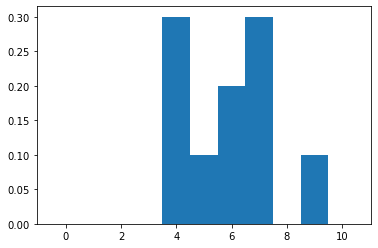

In [142]:
plt.hist(number_heads,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5],density=True)
plt.show()

En lugar de lanzar 10 monedas 10 veces, haz 10 lanzamientos de monedas 1000 veces. Ploteé el histograma del resultado.

In [143]:
number_heads = []

for flip_experiment in range (0,1000):

    flip_results = []
    
    for flip in range(0,10):
        flip_result = np.random.choice([0, 1])
        flip_results.append(flip_result)
    
    number_heads.append(np.sum(flip_results))  

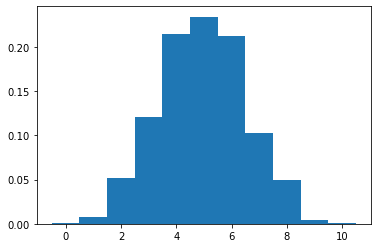

In [144]:
plt.hist(number_heads,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5],density=True)
plt.show()

## Conceptos estadísticos básicos
La estadística es la forma en que analizamos, interpretamos y modelamos datos. Es útil comprender algunos conceptos:

* Población versus muestra: la población es el conjunto de todos los resultados posibles de una medición dada (si tiene un número infinito de puntos de datos), mientras que la muestra es lo que se tiene: un número finito de puntos de datos.

* Probabilidad: la medida de la probabilidad de que ocurra un evento en particular. Si algo es imposible, tiene una probabilidad $P$ de 0. Si es una certeza, tiene una probabilidad $P$ de 1.

* Distribuciones teóricas versus empíricas: Las distribuciones empíricas son datos medidos. Las distribuciones teóricas son funciones analíticas de probabilidad descritas con una ecuación. Estos se pueden aplicar a los datos, lo que permite interpretaciones sobre la probabilidad de observar una medición determinada.


Hay muchos tipos diferentes de distribuciones de probabilidad y la evaluación de las ecuaciones nos da una distribución teórica.

Las muestras son colecciones finitas de observaciones que pertenecen a una distribución. En este ejercicio, simularemos 'mediciones' a través 'observaciones' desde de una distribución teórica. Este es el enfoque es llamado de *Monte Carlo*.

Acabamos de simular un experimento de lanzar una moneda. Comparemos lo que obtuvimos a través de esa simulación con la distribución teórica.

## Distribución binomial:
**Teórico**

Una distribución relativamente sencilla es la distribución binomial que describe la probabilidad de un resultado particular cuando solo hay dos posibilidades (sí o no, cara o sello, 1 o 0). Por ejemplo, en un experimento de lanzamiento de una moneda (cara o sello), si lanzamos la moneda $ n $ veces, ¿cuál es la probabilidad de obtener $ x $ 'caras'? Supongamos que la probabilidad $ p $ de una cara para cualquier lanzamiento de moneda es del 50%; dicho de otra manera $ p $ = 0.5.

La distribución binomial se puede describir mediante una ecuación:

$$P=f(x,p,n)= \frac{n!}{x!(n-x)!}p^x(1-p)^{n-x}$$

Podemos observar este tipo de distribución evaluando la probabilidad de obtener $x$ 'caras' de $ n $ intentos. Codificaremos la ecuación como una función y calcularemos la probabilidad $ P $ de un resultado en particular (por ejemplo, $ x $ caras en $ n $ intentos).

Tenga en cuenta que para el lanzamiento de una moneda, $ p $ es 0.5, pero también se pueden investigar otras preguntas de sí / no (por ejemplo, la posibilidad de encontrar un fósil en una capa sedimentaria, ya sea que ocurra o no un deslizamiento de tierra después de un terremoto).

In [145]:
def binomial_probability(x,p,n):
    """
    This function computes the probability of getting x particular outcomes (heads) in n attempts, where p is the 
    probability of a particular outcome (head) for any given attempt (coin toss).
    
    Parameters
    ----------
    x : number of a particular outcome
    p : probability of that outcome in a given attempt
    n : number of attempts
    
    Returns
    ---------
    prob : probability of that number of the given outcome occuring in that number of attempts
    """

    prob = (np.math.factorial(n)/(np.math.factorial(x)*np.math.factorial(n-x)))*(p**(x))*(1.-p)**(n-x)

    return prob

Podemos usar esta función para calcular la probabilidad de obtener 10 caras ($ x = 10 $) cuando hay 10 lanzamientos de monedas ($ n = 10 $) dados con $ p $ (probabilidad) de 0.5.

In [146]:
binomial_probability(x=10,p=0.5,n=10)

0.0009765625

Calculemos la probabilidad de obtener [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] caras.

In [147]:
head_numbers = np.arange(0,11)
head_numbers

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

[0.0009765625, 0.009765625, 0.0439453125, 0.1171875, 0.205078125, 0.24609375, 0.205078125, 0.1171875, 0.0439453125, 0.009765625, 0.0009765625]


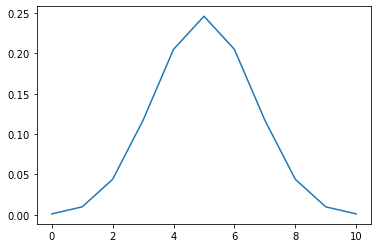

In [148]:
prob_heads = 0.5
n_flips = 10
probabilities = []

for head_number in head_numbers:
    prob = binomial_probability(head_number,prob_heads,n_flips)
    probabilities.append(prob)
    
print(probabilities)

plt.plot(probabilities)
plt.show()

Haga un plot donde se muestre el histograma de 1000 lanzamientos de monedas (usando ``plt.hist()`` con ``density = True``) y plotee la curva obtenido del modelo probabilistico para el respectivo número de caras usando ``plt.plot()``.

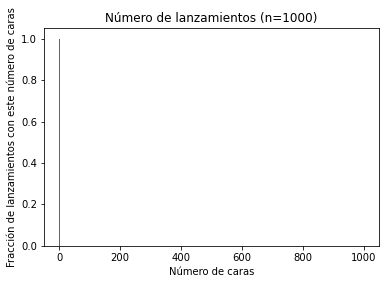

In [178]:
prob_heads = 0.5
n_flips = 1000
probabilities = []

head_numbers = np.arange(0,1001)

for head_number in head_numbers:
    prob = binomial_probability(head_number,prob_heads,n_flips)
    probabilities.append(prob)
    

# plt.plot(probabilities)
plt.hist(probabilities,bins=head_numbers,density = True)
plt.plot()


plt.xlabel('Número de caras') # add labels
plt.ylabel('Fracción de lanzamientos con este número de caras') 

plt.title('Número de lanzamientos (n=1000)');

plt.show()

Si tenemos suerte, lo que deberíamos ver es que el número de lanzamientos de monedas de nuestras muestras aleatorias coincide bastante bien con la distribución de probabilidad teórica. Cuantos más experimentos de lazamientos realizamos numéricamente, mejor debería coincidir.

**Resultado empírico**

El tipo de muestreo que estábamos haciendo arriba donde estábamos lanzando monedas se llama *simulación de Monte Carlo*. Podemos usar datos simulados de todo tipo de distribuciones. Sigamos centrándonos en la distribución binomial y veamos el uso de la función ``np.random.binomial``. 


In [150]:
help(np.random.binomial)

Help on built-in function binomial:

binomial(...) method of numpy.random.mtrand.RandomState instance
    binomial(n, p, size=None)
    
    Draw samples from a binomial distribution.
    
    Samples are drawn from a binomial distribution with specified
    parameters, n trials and p probability of success where
    n an integer >= 0 and p is in the interval [0,1]. (n may be
    input as a float, but it is truncated to an integer in use)
    
    .. note::
        New code should use the ``binomial`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    n : int or array_like of ints
        Parameter of the distribution, >= 0. Floats are also accepted,
        but they will be truncated to integers.
    p : float or array_like of floats
        Parameter of the distribution, >= 0 and <=1.
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
  

``np.random.binomial()`` requiere 2 parámetros, $ n $ y $ p $. Podríamos haber usado esta función antes para obtener la cantidad de caras que se obtuvimos, pero la forma en que lo hicimos también funcionó.

Sigamos el ejemplo que se da en la docstring de ``np.random.binomial()``.

Supongamos ahora un ejemplo más relacionado a las Ciencias de la Tierra. Una empresa petrólera perfora 9 pozos de exploración en lugares sin antecedentes de pozos petróleros (esto en inglés se conoce como *wild-cat exploration*), cada uno de estos pozos tiene una probabilidad de éxito estimada de 10%. Si los nueve pozos fallasen. ¿Cuál es la probabilidad de que eso suceda? 

*Tenga en cuenta que el éxito en este contexto significa que los hidrocarburos líquidos salieron del pozo. En realidad, es posible que no lo considere un éxito dado que el resultado es que se quemarán más hidrocarburos, lo que conducirá a niveles más altos de dióxido de carbono atmosférico y el aumento calentamiento global asociado*.

Si usamos ``np.random.binomial(9, 0.1, 100)`` obtendremos una lista de 100 valores que representan el número de pozos que produjeron petróleo cuando hay un 10% (p = 0.1) de probabilidad de que cada pozo individual produzca petróleo. 

In [151]:
np.random.binomial(9, 0.1, 100)

array([1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1, 1,
       0, 1, 0, 4, 2, 1, 2, 1, 0, 1, 3, 0, 0, 1, 3, 1, 2, 2, 1, 2, 0, 0,
       0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 0, 0, 2, 6, 0, 0, 0, 3, 1,
       2, 1, 2, 0, 1, 3, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 3, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 3, 1, 1, 2, 2, 1, 1, 0])

In [152]:
np.random.binomial(9, 0.1, 100) == 0

array([ True, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False,  True, False,  True, False, False, False,  True, False,
       False, False,  True,  True, False, False,  True, False, False,
       False,  True, False,  True, False, False, False,  True, False,
        True,  True,  True, False, False,  True, False, False,  True,
       False,  True,  True, False,  True, False, False, False, False,
        True,  True,  True, False,  True, False, False, False,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
       False, False, False,  True,  True, False,  True, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
        True])

In [153]:
sum(np.random.binomial(9, 0.1, 100) == 0)

37

Podemos escribir una función que use este proceso para simular la fracción de veces que no hay pozos exitosos para un número dado de pozos, dada una probabilidad y un número dado de simulaciones.

In [154]:
def wildcat_failure_rate(n_wells,prob,n_simulations):
    '''
    Simulate the number of times that there are no successful wells for a given number of wells and a given probability for each well.
    
    Parameters
    ----------
    n_wells : number of well drilled in each simulation
    prob : probability that each well will be successful
    n_simulations : number of times taht drilling n_wells is simulated
    '''
    
    failure_rate = sum(np.random.binomial(n_wells, prob, n_simulations) == 0)/n_simulations
    return failure_rate

Use la función para simular la tasa de fallas para el escenario anterior (10 pozos perforados, 0.1 probabilidad de éxito para cada pozo) y hágalo para 10 simulaciones

In [155]:
wildcat_failure_rate(10,0.1,10)

0.1

Utilice la función para simular la tasa de fallas para el mismo escenario para 1000 simulaciones

In [156]:
wildcat_failure_rate(10,0.1,1000)

0.35

Nuevamente, utilice la función para simular la tasa de fallas para el mismo escenario para 100000 simulaciones

In [157]:
wildcat_failure_rate(10,0.1,100000)

0.34865

En los ejemplos anteriores estamos simulando el resultado. En su lugar, podríamos usar la distribución ``binomial_probability`` para calcular la probabilidad. Siga adelante y haga esto para este ejemplo de *wildcat exploration*.

In [158]:
binomial_probability(10,0.1,1000)

1.3204315071168316e-32

¿Qué tan bien coincide la ``binomial_probability`` calculada con los valores de ``wildcat_failure`` simulados? ¿Cuántas veces necesitas simular el problema para obtener un número que coincida con la probabilidad teórica?

**Escribe tu respuesta aquí**

## Distribución de Poisson

Una distribución de Poisson da la probabilidad de una cantidad de eventos en un intervalo generado por un proceso de Poisson: se conoce el tiempo promedio entre eventos, pero el momento exacto de los eventos es aleatorio. Los eventos deben ser independientes y pueden ocurrir solo uno a la vez.

Dentro de las Ciencias de la Tierra y Planetarias hay muchos procesos que cumplen aproximadamente con este criterio.

**Teórico**

La distribución de Poisson da la probabilidad de que un evento (con dos posibles resultados) ocurra $k$ número de veces en un intervalo de tiempo donde $\lambda$ es la tasa de ocurrencia esperada. La distribución de Poisson es el límite de la distribución binomial para $n$ grandes. Entonces, si toma el límite de la distribución binomial con $ n \longrightarrow \infty$. 

$\displaystyle \lim_{n \rightarrow \infty } \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k} = \frac{n!}{k!(n-k)!}\left(\frac{\lambda}{n} \right)^k \left(1-\frac{\lambda}{n} \right)^{n-k} $ se obtiene la distribución de Poisson:

$P(k$ eventos en un intervalo$) = e^{-\lambda}\frac{\lambda^{k}}{k!}.$

Porque $\displaystyle \lim_{x \rightarrow \infty } \left(1+\frac{a}{x} \right)^{x}=e^{a}$ y $\displaystyle \lim_{x \rightarrow \infty } \frac{x!}{x^{k}(x-k)!} = 1$



In [159]:
def poisson_probability(k,lamb):
    """
    This function computes the probability of getting k particular outcomes when the expected rate is lam.
    """
    
    # compute the poisson probability of getting k outcomes when the expected rate is lam
    prob = (np.exp(-1*lamb))*(lamb**k)/np.math.factorial(k)
    
    #return the output
    return prob

## Observando meteoros
![](AMS_TERMINOLOGY.png)

Información extraída de https://www.amsmeteors.org/meteor-showers/meteor-faq/:

> **¿Qué tamaño tienen la mayoría de los meteoroides? ¿Qué tan rápido viajan?** La mayoría de los meteoros visibles son causados por partículas que varían en tamaño desde aproximadamente el de una pequeña roca hasta un grano de arena, y generalmente pesan menos de 1-2 gramos. Los de origen asteroide pueden estar compuestos de material denso, pedregoso o metálico (una minoría), mientras que los de origen cometario (la mayoría) tienen densidades bajas y están compuestos por un conglomerado material "esponjoso", con frecuencia llamado "bola de polvo". El brillante destello de luz de un meteoro no es causado tanto por la masa del meteoroide, sino por su alto nivel de energía cinética cuando choca con la atmósfera.

> Los meteoritos entran en la atmósfera a velocidades que van desde los 11 km/s hasta los 72 km/s. Cuando el meteoroide choca con las moléculas de aire, su alto nivel de energía cinética ioniza rápidamente y excita una columna larga y delgada de átomos atmosféricos a lo largo de la trayectoria del meteoroide, creando un destello de luz visible desde el suelo. Esta columna, o rastro de meteoritos, suele tener menos de 1 metro de diámetro, pero tendrá decenas de kilómetros de largo.

> La amplia gama de velocidades de los meteoroides se debe en parte al hecho de que la Tierra misma viaja a unos 30 km/s mientras gira alrededor del sol. En el lado de la tarde, o el lado de fuga de la Tierra, los meteoroides deben alcanzar la atmósfera terrestre para causar un meteoro y tienden a ser lentos. En el lado de la mañana, o en el lado donde pueden chocar con la Tierra, los meteoroides pueden chocar de frente con la atmósfera y tienden a ser rápidos.

>  **¿Qué es una lluvia de meteoritos? ¿Se produce una lluvia "todas a la vez" o durante un período de tiempo?** La mayoría de las lluvias de meteoros tienen su origen en los cometas. Cada vez que un cometa pasa por el sol, produce copiosas cantidades de partículas del tamaño de un meteoroide que eventualmente se esparcirán a lo largo de toda la órbita del cometa para formar una "corriente" de meteoroides. Si la órbita de la Tierra y la órbita del cometa se cruzan en algún punto, entonces la Tierra pasará a través de esta corriente durante unos días aproximadamente al mismo tiempo cada año, encontrando una lluvia de meteoritos.

>  La única lluvia importante que se muestra claramente como no cometaria es la lluvia Gemínida, que comparte una órbita con el asteroide (3200 Phaethon): una que se acerca inusualmente al sol y pasa por la órbita de la Tierra. La mayoría de los meteoroides de lluvia parecen ser "esponjosos", pero las Gemínidas son mucho más duraderas como podría esperarse de los fragmentos de asteroides.

## Observando un lluvia de meteoritos

Supongamos que planeas salir e intentar ver estrellas fugaces esta noche en un lugar relativamente alejado de la cuidad. A una tasa de 5 meteoros observados por hora, ¿cuál es la probabilidad de observar 6?

Podemos usar la función de probabilidad de Poisson para responder esta pregunta:

In [160]:
lamb = 5
k = 6
prob = poisson_probability(k,lamb)
print(prob)

0.1462228081398756


Entonces, ese resultado nos dice que hay un 14,6% de probabilidad de observar exactamente 6, pero sería mucho más útil poder visualizar la distribución de probabilidad. Entonces, repasemos y calculemos la probabilidad de ver cualquier número entre 0 y 10. Primero, podemos hacer una matriz entre 0 y 11:

In [161]:
number_meteors_seen = np.arange(0,11)
number_meteors_seen

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [162]:
meteor_sighting_probability = []
meteor_rate = 5

for n in number_meteors_seen:
    prob = poisson_probability(number_meteors_seen[n],meteor_rate)
    meteor_sighting_probability.append(prob)

In [163]:
meteor_sighting_probability

[0.006737946999085467,
 0.03368973499542734,
 0.08422433748856833,
 0.14037389581428056,
 0.1754673697678507,
 0.1754673697678507,
 0.1462228081398756,
 0.104444862957054,
 0.06527803934815875,
 0.03626557741564375,
 0.01813278870782187]

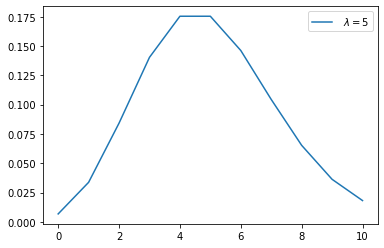

In [164]:
plt.plot(number_meteors_seen,meteor_sighting_probability,label=' $\lambda = 5$')
plt.legend()
plt.show()

Cuando no hay una lluvia activa, la tasa de meteoros de fondo es de aproximadamente 2 por hora (aunque es variable según la hora de la noche y la temporada; vea más aquí: https://www.amsmeteors.org/meteor-showers/meteor-faq/).

Calcule la probabilidad de ver diferentes números de meteoros cuando la velocidad es de 2 por hora ($\lambda = 2$). Plotee esa probabilidad junto con la probabilidad de ver esos mismos números durante una lluvia de estrellas de $\lambda = 5$.

## Simular la observación de meteoritos

Hay muchos casos en los que puede resultar útil simular un conjunto de datos. En este caso, se podría simular cuál podría ser su experiencia en términos de la cantidad de horas que podría pasar mirando el cielo nocturno y viendo 1 meteorito o más en una noche normal frente a una noche con la lluvia de 5 meteoritos por hora. 

Podemos usar la función ``np.random.poisson`` para simular datos 'realistas'.

``np.random.poisson()`` requiere un parámetro ``lam`` y otro opcional. Cada llamada a ``np.random.poisson()`` devuelve el tamaño del número de extracciones de una distribución de Poisson con $\lambda = $ ``lam``.

Probémoslo con $\lambda = 2$ (la tasa de meteoritos por hora).

In [165]:
lam = 2
number_hours_watched = 100
number_hours_w_meteor_sighting = []

for n in np.arange(0,number_hours_watched):
    number_meteors = np.random.poisson(lam)
    if number_meteors >= 1:
        number_hours_w_meteor_sighting.append(1)
        
fraction_w_sighting = len(number_hours_w_meteor_sighting)/number_hours_watched
print('porcentaje de horas observadas con un avistamiento de meteoritos')
print(fraction_w_sighting*100)

porcentaje de horas observadas con un avistamiento de meteoritos
85.0


Haz la misma simulación de observación de meteoritos con $\lambda = 5$. Hágalo durante 10 horas, 100 horas, 100.000 horas.

In [166]:
lam = 5
number_hours_watched = 10
number_hours_w_meteor_sighting = []

for n in np.arange(0,number_hours_watched):
    number_meteors = np.random.poisson(lam)
    if number_meteors >= 1:
        number_hours_w_meteor_sighting.append(1)
        
fraction_w_sighting = len(number_hours_w_meteor_sighting)/number_hours_watched
print('porcentaje de horas observadas con un avistamiento de meteoritos')
print(fraction_w_sighting*100)

porcentaje de horas observadas con un avistamiento de meteoritos
100.0


In [167]:
# Escribe tu codigo aquí
lam = 5
number_hours_watched = 100
number_hours_w_meteor_sighting = []

for n in np.arange(0,number_hours_watched):
    number_meteors = np.random.poisson(lam)
    if number_meteors >= 1:
        number_hours_w_meteor_sighting.append(1)
        
fraction_w_sighting = len(number_hours_w_meteor_sighting)/number_hours_watched
print('porcentaje de horas observadas con un avistamiento de meteoritos')
print(fraction_w_sighting*100)

porcentaje de horas observadas con un avistamiento de meteoritos
99.0


In [168]:
# Escribe tu codigo aquí
lam = 5
number_hours_watched = 100000
number_hours_w_meteor_sighting = []

for n in np.arange(0,number_hours_watched):
    number_meteors = np.random.poisson(lam)
    if number_meteors >= 1:
        number_hours_w_meteor_sighting.append(1)
        
fraction_w_sighting = len(number_hours_w_meteor_sighting)/number_hours_watched
print('porcentaje de horas observadas con un avistamiento de meteoritos')
print(fraction_w_sighting*100)

porcentaje de horas observadas con un avistamiento de meteoritos
99.32600000000001
